### Naive Bayes and K-Nearest Neighbour

Load, explore and pre-process (if needed) the dataset. Consider we are going to train a Naive
Bayes classifier, and a k-Nearest Neighbour classifier: which kind of pre-processing is
required for the two models?

In [62]:
import pandas as pd
import numpy as np
df_data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
                        , sheet_name="Training_Data")
df_data = df_data.loc[:, ~df_data.columns.str.contains('^Unnamed')]
df_data.drop(columns=["Attribute Information:"], inplace=True)

data = df_data.loc[:, df_data.columns != ' UNS']
target =pd.DataFrame(df_data[' UNS'])

Since the target label is a string it needs to be encoded to a numerical value:

In [63]:
from sklearn.preprocessing import LabelEncoder

print(target.head())
label_encoder = LabelEncoder()
target = pd.DataFrame(label_encoder.fit_transform(np.ravel(target)))

        UNS
0  very_low
1      High
2       Low
3    Middle
4       Low


In [64]:
data.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [65]:
data.dtypes

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
dtype: object

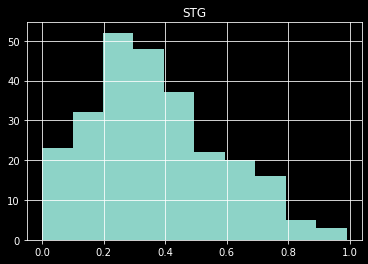

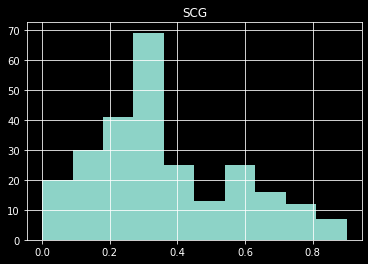

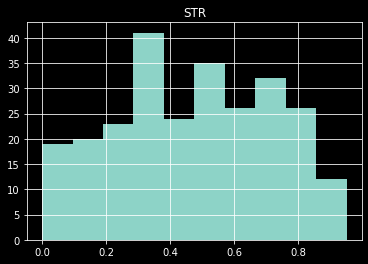

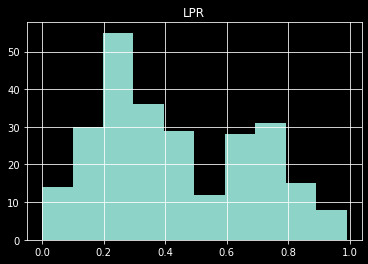

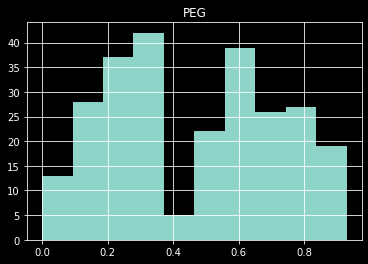

In [66]:
from matplotlib import pyplot as plt

plt.style.use('dark_background')
for column in data.columns:
    data.hist(column = column)

We already have scaled and non missing values, we do not need other pre-processing steps.
Since we have continuous values we will use a Gaussian Naive Bayes model.

Train a Naive Bayes classifier (identify the correct classifier to train, according to the data
types). Access the generalization performances of the model by means of a cross fold
validation methodology, with k=4 folds.

In [81]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
skf = StratifiedKFold(n_splits=4)
scores = cross_val_score(gnb, data, np.ravel(target), cv = skf, scoring='accuracy')
print('Cross-validation training scores:{}'.format(scores))
print('Average cross-validation training score: {}'.format(scores.mean()))

Cross-validation training scores:[0.90769231 0.81538462 0.90625    0.71875   ]
Average cross-validation training score: 0.8370192307692308


Split the dataset in train and test sets and train a single Naive Bayes classifier on the train
set. Evaluate it on the test set (accuracy, precision, recall, f1-score) and calculate a confusion
matrix.

In [68]:
from sklearn.metrics import precision_recall_fscore_support

df_test = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
                        , sheet_name="Test_Data")
df_test = df_test.loc[:, ~df_test.columns.str.contains('^Unnamed')]
df_test.drop(columns=["Attribute Information:"], inplace=True)

test_data = df_test.loc[:, df_test.columns != ' UNS']
test_target =pd.DataFrame(df_test[' UNS'])
test_target = pd.DataFrame(label_encoder.fit_transform(np.ravel(test_target)))
gnb = GaussianNB().fit(data, np.ravel(target))
predictions = gnb.predict(test_data)

precision_recall_fscore_support(test_target, predictions)

(array([1.        , 0.68852459, 0.86206897, 1.        ]),
 array([1.        , 0.91304348, 0.73529412, 0.61538462]),
 array([1.        , 0.78504673, 0.79365079, 0.76190476]),
 array([39, 46, 34, 26], dtype=int64))

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions, test_target)


array([[39,  0,  0,  0],
       [ 0, 42,  9, 10],
       [ 0,  4, 25,  0],
       [ 0,  0,  0, 16]], dtype=int64)

Train a k-Nearest Neighbour classifier (identifying the best value of k) on the previously
selected training set. Evaluate it on the test set (accuracy, precision, recall, f1-score) and
calculate a confusion matrix.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}
grid_search = GridSearchCV(KNeighborsClassifier(), param, cv=5)
grid_search_results = grid_search.fit(data, np.ravel(target))
grid_search_results.best_params_


{'n_neighbors': 4}

Compare the results obtained by the two models.

In [78]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(data, np.ravel(target))
knn_predictions = knn.predict(test_data)
confusion_matrix(knn_predictions, test_target)


array([[39,  0,  1,  0],
       [ 0, 45,  6, 19],
       [ 0,  1, 27,  0],
       [ 0,  0,  0,  7]], dtype=int64)

In [79]:
precision_recall_fscore_support(test_target, knn_predictions)

(array([0.975     , 0.64285714, 0.96428571, 1.        ]),
 array([1.        , 0.97826087, 0.79411765, 0.26923077]),
 array([0.98734177, 0.77586207, 0.87096774, 0.42424242]),
 array([39, 46, 34, 26], dtype=int64))

In [86]:
knn_scores = cross_val_score(knn, test_data, np.ravel(test_target), cv = skf, scoring='accuracy')
gnb_scores = cross_val_score(gnb, test_data, np.ravel(test_target), cv = skf, scoring='accuracy')
print('Knn average cross-validation test score: {}'.format(knn_scores.mean()))
print('Gaussian naive bayes average cross-validation test score: {}'.format(gnb_scores.mean()))

Knn average cross-validation test score: 0.7931681681681682
Gaussian naive bayes average cross-validation test score: 0.8134384384384384


In general the gaussian naive bayes model seems slightly superior in this case.